<h1>Importing dependencies and data</h1>

We will explore stock market of high-tech giants: "Amazon", "Microsoft", "Facebook", "Google", "Apple".

Analysis includes:
1. Defining trend of stocks' prices (using moving average);
1. Defining less correlated stocks;
1. Calculating risk at value;
1. Predicting stock movement (using monte-carlo).

We will use quandl data from June 2017 till March 2018.

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import quandl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime
import scipy.stats as models

In [3]:
stocks= ['AAPL','GOOG','MSFT','AMZN','FB']
base = 'WIKI/'

In [4]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

quandl.ApiConfig.api_key = 'rKiya_T2habxgLe2f7Aa'
for stock in stocks:
    ticker = base + stock
    globals()[stock] = quandl.get(ticker, start_date = start, end_date = end).drop([
        'Ex-Dividend', 'Split Ratio','Adj. Open', 'Adj. High', 'Adj. Low','Adj. Volume'], axis = 1)

<h3>Price dynamics</h3>

Let's look at Apple's closing price during defined period.

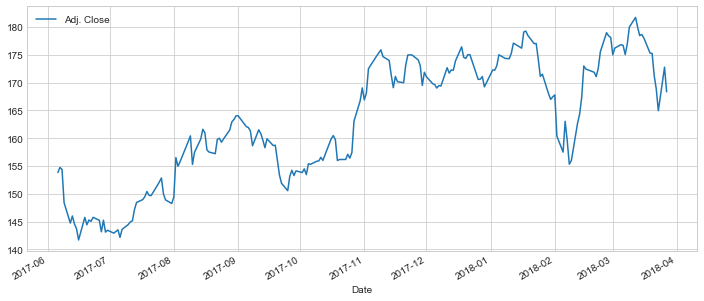

In [5]:
AAPL['Adj. Close'].plot(legend=True,figsize=(12,5))

Trade volume.

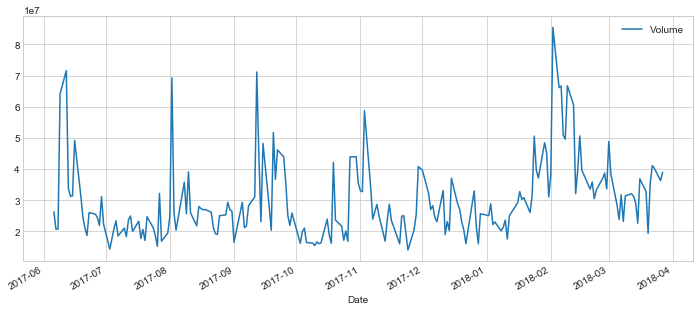

In [6]:
AAPL['Volume'].plot(legend=True,figsize=(12,5))

We see that the peaks of the fall in the closing price of Apple’s shares largely coincide with the peaks of the growth in trading volume for the shares of this company (for example, in early February 2018). This is not surprising: investors tend to buy shares in the period of a significant drop in its price.

<h3>Moving average</h3>

In order to determine the direction of the trend of the asset's closing price change more reliably, we use the moving average.

In [7]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = AAPL['Adj. Close'].rolling(window=ma,center=False).mean()

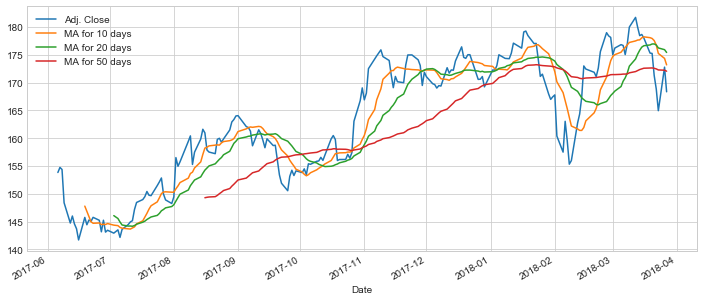

In [8]:
AAPL[['Adj. Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(12,5))

The graph shows that with an increase in k — the number of neighboring days when calculating the moving average closing price of an asset from 10 to 50, fluctuations around the trend are leveled: this is due to a decrease in the proportion of neighboring days, in which there was a sharp price jump, in the overall structure calculating the moving average asset price.

Thus, we can conclude that with a sufficiently high k (k = 50) an uptrend in the price of an asset is observed, as a result of which we can recommend our investor to invest in Apple shares both for a long time and for the purpose of playing short and long positions, as the moving average over 10 days has a noticeably greater volatility than over 50 days.

<h3>Daily yield</h3>

In [9]:
AAPL['Daily Return'] = AAPL['Adj. Close'].pct_change()

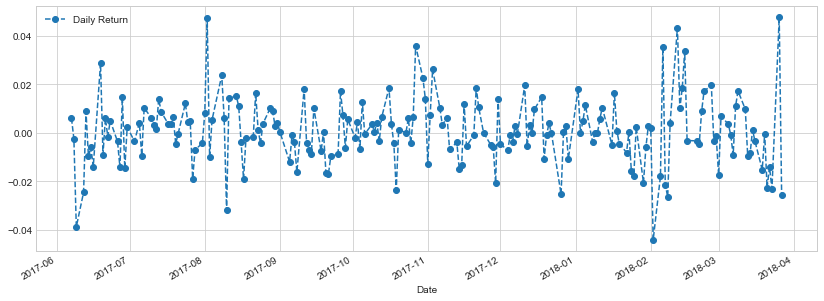

In [10]:
AAPL['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

The dynamics of the daily yield over the period taken is described by a random walk around zero.

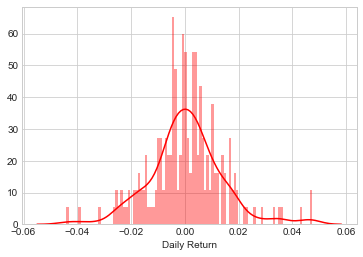

In [11]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='red')

The distribution of returns is similar to normal. Test the hypothesis using the Anderson test at a 10% significance level.

In [12]:
result = models.anderson(AAPL['Daily Return'].dropna(), dist = 'norm')
if result[1][1] > result[0]:
    print('Dictribution normality hypotesis NOT rejected')
else:
    print('Dictribution normality hypotesis rejected')

Гипотеза о соответствии распределения нормальному отвергается


<h3>Yield correlation</h3>

In the Theory of Finance it is considered that when making a diversified portfolio, all other things equal, sets of the least correlated assets are considered more reliable. Suppose our investor is a portfolio of two assets. For this purpose, we will carry out a correlation analysis in order to reveal a pair with the smallest closeness of connection.

In [13]:
close_df = pd.concat(
    (AAPL['Adj. Close'], GOOG['Adj. Close'], MSFT['Adj. Close'], AMZN['Adj. Close'], FB['Adj. Close']), axis = 1)
close_df.columns = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB']
rets_df = close_df.pct_change()

In [14]:
close_df

,AAPL,GOOG,MSFT,AMZN,FB
Date,,,,,
2017-06-06,153.825860,976.57,71.772501,1002.970,152.81
2017-06-07,154.742142,981.08,71.643841,1010.070,153.12
2017-06-08,154.363677,983.41,71.203428,1009.940,154.71
2017-06-09,148.377964,949.83,69.595178,978.310,149.63
2017-06-12,144.732754,942.90,69.060744,964.830,148.44
2017-06-13,145.997622,953.40,69.921776,980.790,150.68
2017-06-14,144.573401,950.76,69.545693,976.470,150.25
2017-06-15,143.706917,942.31,69.179507,964.170,149.80
2017-06-16,141.695080,939.78,69.278476,987.710,150.64


Let's look at the correlation between the returns of Google and Apple stocks.

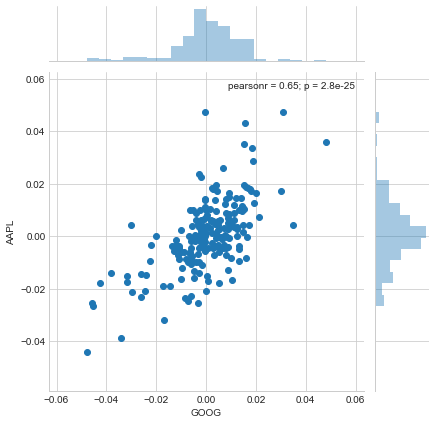

In [15]:
sns.jointplot('GOOG','AAPL',rets_df,kind='scatter')

The graph shows a combination of returns of two different assets for the study period. The distribution of these combinations takes the form of a polygon, the closeness of the connection is 0.65

Now look at all the possible pairs.

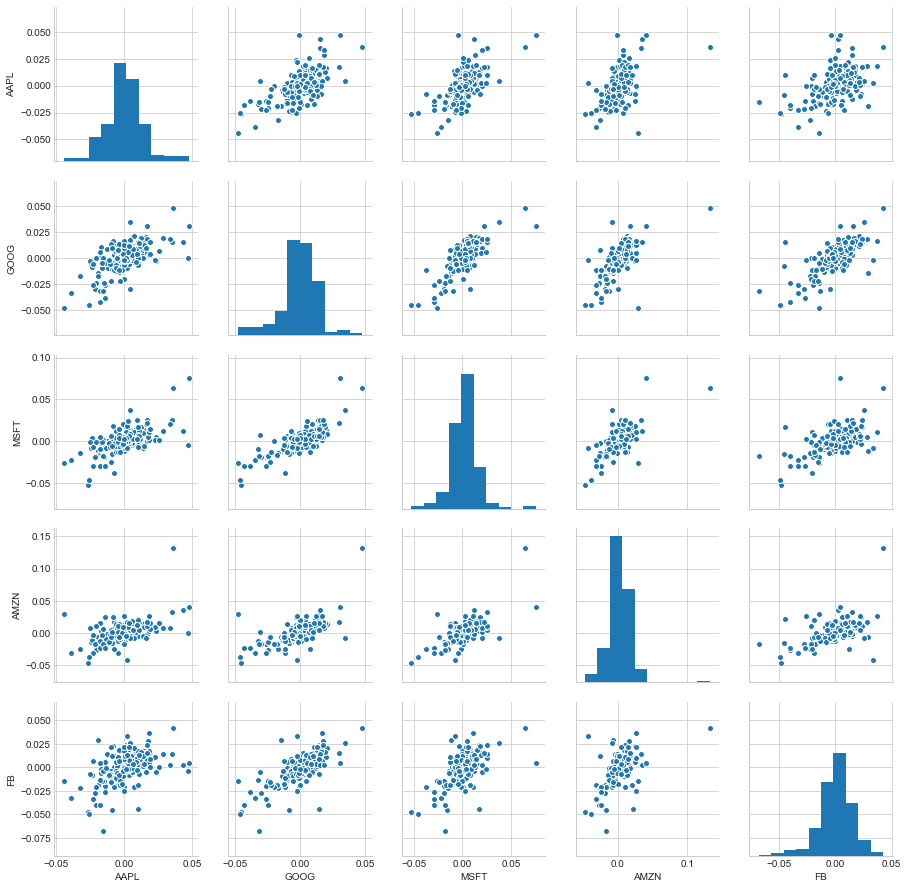

In [16]:
sns.pairplot(rets_df.dropna())

          AAPL      GOOG      MSFT      AMZN        FB
AAPL  1.000000  0.647590  0.646735  0.529800  0.484221
GOOG  0.647590  1.000000  0.782155  0.660046  0.730220
MSFT  0.646735  0.782155  1.000000  0.678564  0.584556
AMZN  0.529800  0.660046  0.678564  1.000000  0.549724
FB    0.484221  0.730220  0.584556  0.549724  1.000000


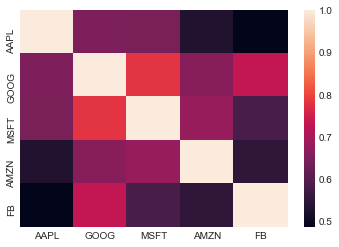

In [17]:
corr = rets_df.dropna().corr()
sns.heatmap(corr)
print(corr)

From the correlogram, it follows that the pair of Facebook-Apple assets (0.48) has the least connection closeness. That is, if the investor’s portfolio consists of two assets out of five possible and a collapse of shares of one of the two selected companies occurs, all other things being equal, a drop in the return on one asset is less likely to result in a fall in the other, if the portfolio consists of Facebook shares. "and Apple."

From the conducted correlation analysis it can follow that if an investor comes to the stock market with a conservative attitude and is focused on stable profitability with minimization of risks, then we can recommend him to pay attention to this pair.

<h3>Stock's risk</h3>

Of course, the assessment of the closeness of ties is not the only criterion for the compilation of an optimal portfolio. Another equally important factor in choosing the composition of a portfolio is the ratio of risk and return on assets.

The easiest way to estimate is to look at the ratio of expected return to its standard deviation.

In [18]:
rets = rets_df.dropna()

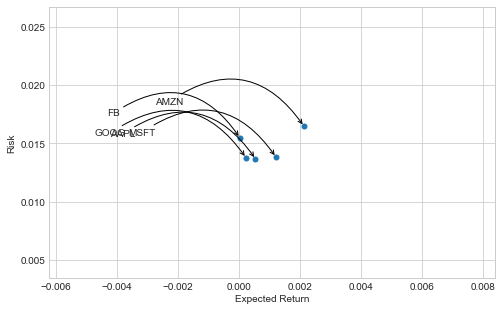

In [19]:
plt.figure(figsize=(8,5))

plt.scatter(rets.mean(),rets.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy=(x,y),xytext=(-120,20),
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    arrowprops = dict(arrowstyle='->',connectionstyle = 'arc3,rad=-0.5'))

For example, the Amazon share is characterized by the highest level of profitability, but also the highest level of risk. Shares of "Google", "Apple" and "Microsoft" have the lowest level of risk at about the same level, of which "Microsoft" is characterized by the highest return.

Thus, if our investor is characterized by a positive attitude to risk and has entered the market in order to obtain superprofits, for him the highest priority characteristic will be the profitability of the asset, based on which we can offer him to invest without remainder in Amazon. If he is inclined to avoid risk and get a stable return, investing in assets with the lowest level of risk would be a higher priority for him. At the same time, he, most likely, would prefer to have the most diversified portfolio, on the basis of which we could recommend him to invest in “Google”, “Apple” and “Microsoft”.

<h3>Value at risk</h3>

<h4>Bootstrap</h4>

Due to the fact that we want to assess the distribution of data on the price of an asset for the future, that is, not yet realized outcomes, we will have to deal with generating pseudo-samples based on the primary and building confidence intervals for the generated distribution. For this purpose, the bootstrap approach is traditionally used.

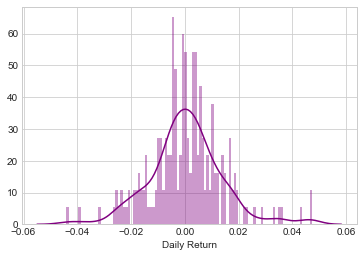

In [30]:
boot=sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [31]:
rets['AAPL'].quantile(0.05)

-0.021407102987180293

With 95% confidence, we can expect that in the worst day from the point of view of profitability we will lose no more than 2.14%.

<h3>Forecasting</h3>

Now imagine that the investor is going to invest in the shares of the company "Google", but at the same time can realize the shares only after a calendar year. Of course, throughout this year the company is not insured against falling and bankruptcy, which will lead to a burnout of equity investments for the investor. Due to the fact that the dynamics of stock returns are influenced by an uncertainty factor, in order to get an answer to the question about the profitability of investing in Google stocks, the Monte-Carlo method fits perfectly.

In [32]:
days = 365

dt = 1/365

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [33]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

Text(0.5,1,'Monte Carlo Analysis for Google')

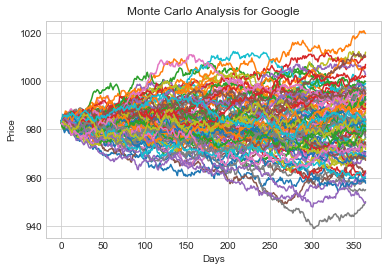

In [34]:
start_price = GOOG['Open'][0]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Just so, the algorithm fulfills 10,000 scenarios of the asset price change throughout the year.

In [35]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

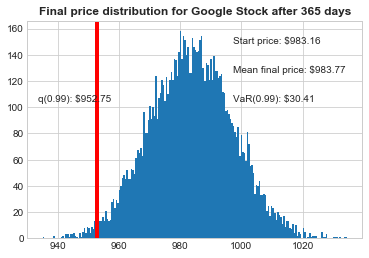

In [36]:
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')

An histogram of the asset price distribution was constructed a calendar year after the purchase of the stock with 10,000 simulations generated.

On the chart, we see that with a purchase price of \\$976.55, the total share price for the most likely scenarios ranges from \\$945.83 to \\$1007.27 (unlikely tails were cut off at a 1% level of reliability).

The average total price of the stock was \\$976.70, which suggests that at 1% significance level, the average expected earnings per Google share will be \\$0.15.

Thus, for a given level of reliability and the number of simulations, we cannot recommend an investor to invest in Google shares for such a long time. Regarding the analysis, the most expected return is close to 0, which suggests that this paper is interesting from the point of view of constant play on short and long positions, rather than for a long-term investment.

Below is a graph of the behavior of the google stock price, and if we expect a constant behavior from this stock relative to the daily data for the last year, then a periodic game of “short and long” is more likely to yield more profitability than investing for a year.

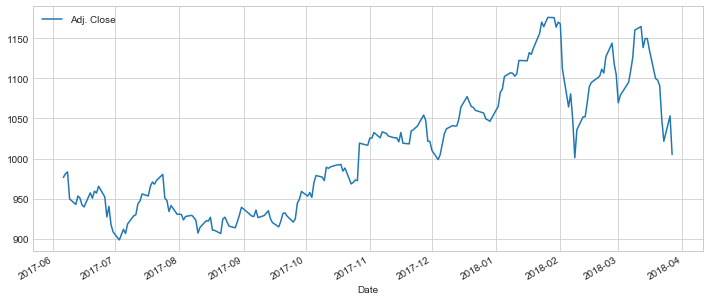

In [20]:
GOOG['Adj. Close'].plot(legend=True,figsize=(12,5))